In [1]:
import plotnine as p9
from mizani.formatters import comma_format
from ug2021.data import results

In [2]:
candidate_colors = {
    "Museveni": "#F3C02A",
    "Kyagulanyi": "#E41E2F",
    "Amuriat": "#006BFF",
    "Muntu": "#9954AD",
    "Mao": "#028100",
    "Tumukunde": "gray",
    "Kabuleta": "gray",
    "Kalembe": "gray",
    "Katumba": "gray",
    "Mwesigye": "gray",
    "Mayambala": "gray",
}
p9.theme_set(p9.theme_light())

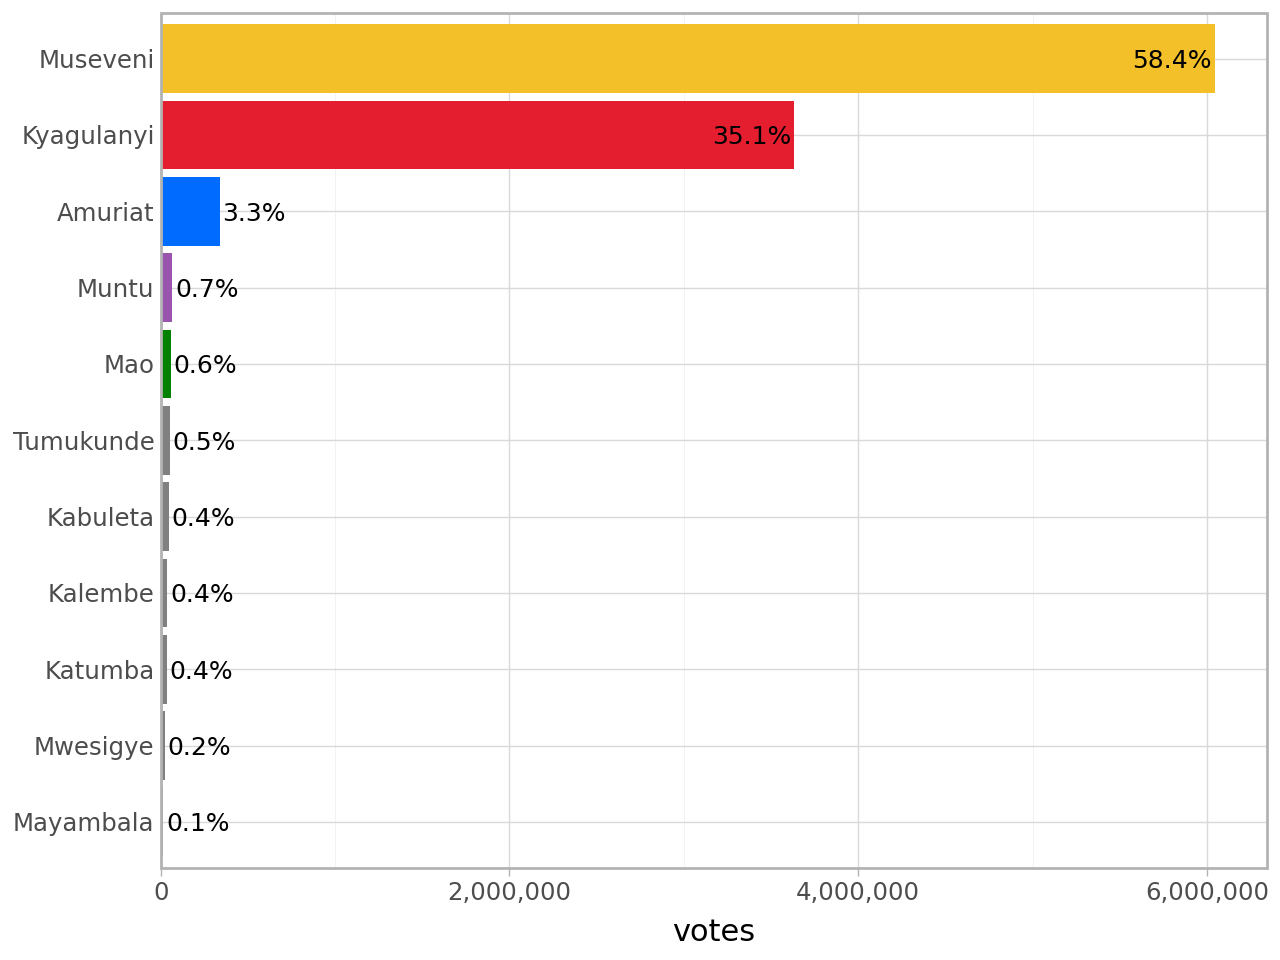

In [3]:
def ha_align_left(s, threshold):
    return ["left" if x <= threshold else "right" for x in s]

def add_plus_minus(s, threshold, amount):
    return [amount if x <= threshold else -amount for x in s]

p = (
    results.national_long
    >> p9.ggplot(p9.aes("reorder(candidate, votes)", "votes"))
    + p9.geom_col(p9.aes(fill="candidate"), show_legend=False)
    + p9.geom_text(
        p9.aes(
            label="100*votes / valid",
            ha=p9.after_stat("ha_align_left(label, 3.3)"),
            y=p9.stage("votes", "y+add_plus_minus(label, 3.3, 15000)")
        ),
        format_string="{:.1f}%",
        size=9,
        va="center_baseline",
    )
    + p9.scale_y_continuous(expand=(0, 0, .05, 0), labels=comma_format())
    + p9.scale_fill_manual(values=candidate_colors)
    + p9.labs(x="")
    + p9.coord_flip()
    + p9.theme(
        #dpi=200,
        axis_ticks_y=p9.element_blank()
    )
)
p

In [4]:
results.__all__

('polling_station_results',
 'stations_wide',
 'parishes_wide',
 'subcounties_wide',
 'constituencies_wide',
 'districts_wide',
 'national_wide',
 'stations_long',
 'parishes_long',
 'subcounties_long',
 'constituencies_long',
 'districts_long',
 'national_long')

In [5]:
# Results by region
# results.districts_long['district'].unique().to_list()

# District and regions
regions = {
'Acholi': ['Gulu City', 'Gulu', 'Amuru', 'Pader',
           'Nwoya', 'Kitgum', 'Omoro', 'Lamwo', 'Agago'],
'Ankole': ['Ibanda','Sheema', 'Rubirizi',
           'Kazo', 'Ntungamo', 'Kiruhura',
           'Buhweju', 'Isingiro', 'Rwampara', 'Mitooma',
           'Mbarara City', 'Bushenyi', 'Mbarara',],
'Central': ['Buikwe', 'Mukono', 'Lyantonde', 'Kampala', 'Ssembabule',
            'Luwero', 'Rakai', 'Nakasongola', 'Kiboga', 'Masaka', 'Masaka City', 'Wakiso',
            'Gomba', 'Mityana', 'Kayunga', 'Kyotera', 'Bukomansimbi', 'Mpigi', 'Nakaseke',
            'Kalangala', 'Butambala', 'Mubende', 'Lwengo', 'Kassanda', 'Kyankwanzi',
            'Buvuma', 'Kalungu',
           ],
'Lango': ['Lira', 'Lira City', 'Kole', 'Dokolo', 'Kwania', 'Oyam',
          'Apac', 'Amolatar', 'Otuke', 'Alebtong'],
'Bugisu': ['Bududa','Mbale', 'Mbale City', 'Manafwa', 'Sironko',
           'Namisindwa',
           'Bulambuli',],
'Bukedi': ['Kibuku', 'Butaleja', 'Tororo', 'Budaka', 'Butebo',
           'Busia', 'Pallisa',],
'Karamonja': ['Kaabong', 'Nakapiripirit', 'Karenga', 'Kotido',
              'Abim', 'Moroto', 'Napak', 'Nabilatuk','Amudat', 'Karenga'],
'Bunyoro': ['Hoima City', 'Kiryandongo', 'Buliisa',
            'Kibaale', 'Masindi',
            'Kagadi', 'Kakumiro', 'Kikuube', 'Hoima'],
'Busoga': ['Namayingo','Bugweri','Jinja','Namutumba', 'Bugiri', 'Mayuge',
           'Jinja City', 'Kaliro', 'Iganga','Luuka','Buyende', 'Kamuli',
          ],
    
'Kigezi': ['Rukiga', 'Rubanda', 'Kisoro', 'Rukungiri', 'Kanungu', 'Kabale',],
'Madi': ['Moyo', 'Obongi', 'Adjumani', ],
'Rwenzori': ['Bundibugyo', 'Kasese', 'Ntoroko', ],
'Sebei': ['Kween', 'Kapchorwa', 'Bukwo',],
'Teso': ['Amuria', 'Ngora', 'Kumi', 'Serere', 'Kaberamaido', 'Bukedea',
         'Soroti City', 'Soroti', 'Kalaki', 'Katakwi', 'Kapelyong'],
'Tooro': ['Fort Portal City', 'Bunyangabu', 'Kabarole', 'Kyegegwa',
          'Kitagwenda', 'Kamwenge', 'Kyenjojo',],
'West Nile': ['Arua City', 'Arua', 'Pakwach', 'Yumbe',
              'Koboko', 'Nebbi', 'Zombo', 'Madi Okollo',
              'Maracha', 'Terego',],
}

# Test number of districts, 146
number = 0
for key in regions.keys():
    number += len(regions[key])

number


def districtRegion(district):
    for region in regions.keys():
        # if district in region
        if district in regions.get(region):
            # return region
            return region
        else:
            pass

In [6]:
# Append regions to dataframe
df = results.districts_long
df

district,registered,valid,invalid,total,turnout,candidate,votes,won,rank
str,i64,i64,i64,i64,f64,str,i64,bool,i64
"""Abim""",36539,23588,875,24463,66.950382,"""Amuriat""",433,false,3
"""Adjumani""",79364,46421,2540,48961,61.691699,"""Amuriat""",1179,false,3
"""Agago""",98354,63961,2572,66533,67.646461,"""Amuriat""",1595,false,4
"""Alebtong""",115804,65620,3207,68827,59.434044,"""Amuriat""",1920,false,3
"""Amolatar""",71173,51276,1908,53184,74.724966,"""Amuriat""",3349,false,3
…,…,…,…,…,…,…,…,…,…
"""Terego""",95118,48360,4497,52857,55.569924,"""Museveni""",24718,true,1
"""Tororo""",268434,154503,5792,160295,59.714865,"""Museveni""",86248,true,1
"""Wakiso""",1154086,561500,12518,574018,49.737888,"""Museveni""",122505,false,2


In [7]:
df = df.to_pandas()
df['region'] = df['district'].apply(lambda x:
                                     districtRegion(x))
df

,district,registered,valid,invalid,total,turnout,candidate,votes,won,rank,region
0,Abim,36539,23588,875,24463,66.950382,Amuriat,433,False,3,Karamonja
1,Adjumani,79364,46421,2540,48961,61.691699,Amuriat,1179,False,3,Madi
2,Agago,98354,63961,2572,66533,67.646461,Amuriat,1595,False,4,Acholi
3,Alebtong,115804,65620,3207,68827,59.434044,Amuriat,1920,False,3,Lango
4,Amolatar,71173,51276,1908,53184,74.724966,Amuriat,3349,False,3,Lango
...,...,...,...,...,...,...,...,...,...,...,...
1601,Terego,95118,48360,4497,52857,55.569924,Museveni,24718,True,1,West Nile
1602,Tororo,268434,154503,5792,160295,59.714865,Museveni,86248,True,1,Bukedi
1603,Wakiso,1154086,561500,12518,574018,49.737888,Museveni,122505,False,2,Central
1604,Yumbe,113855,71150,4075,75225,66.070880,Museveni,50686,True,1,West Nile


In [8]:
# Unclassified districts
df['candidate'].unique()

array(['Amuriat', 'Kabuleta', 'Kalembe', 'Katumba', 'Kyagulanyi', 'Mao',
       'Mayambala', 'Muntu', 'Mwesigye', 'Tumukunde', 'Museveni'],
      dtype=object)

In [9]:
df.groupby(['district', 'candidate', 'votes']).sum()[['registered', 'total', 'won']]

registered  total  won
district candidate  votes                        
Abim     Amuriat    433         36539  24463    0
         Kabuleta   71          36539  24463    0
         Kalembe    66          36539  24463    0
         Katumba    179         36539  24463    0
         Kyagulanyi 3956        36539  24463    0
...                               ...    ...  ...
Zombo    Mayambala  207        123432  64591    0
         Muntu      498        123432  64591    0
         Museveni   45578      123432  64591    1
         Mwesigye   305        123432  64591    0
         Tumukunde  606        123432  64591    0

[1606 rows x 3 columns]

In [10]:
# Districts in which a candidate won
def districtLead(df):
    # aggregate results per district
    df = df.groupby('district').sum()

    # return district where candidate has maximum votes
    

In [11]:
# Districts in which a candidate won
df[(df['candidate'] == 'Kalembe') & (df['won'] == True)].groupby(['region', 'district', 'votes']).sum()

,,,registered,valid,invalid,total,turnout,candidate,won,rank
region,district,votes,,,,,,,,


In [ ]:
 results.stations_wide

In [78]:
# Analysis by polling station
# Less popular candidates winning at polling stations
df2 = results.stations_wide
df2 = df2.to_pandas()
df2[(df2['winner'] != 'Museveni') & (df2['winner'] != 'Kyagulanyi')]['winner']


def candidatePollingStation(candidate, df):
    df = results.stations_wide
    df = df.to_pandas()
    return df[df['winner'] == candidate]

14       Kyagulanyi, Museveni
470      Kyagulanyi, Museveni
1027                  Amuriat
1049                  Amuriat
1053                  Amuriat
                 ...         
33146               Tumukunde
33169               Tumukunde
33260               Tumukunde
33901                 Katumba
33908                 Katumba
Name: winner, Length: 327, dtype: object